In [ ]:
!gdown --id 1yQNRPiNetJGmXFcGhdG3mhpRkRVznQe6 #68PersonBmp
!gdown --id 1rDQ_3BkzGFz2--7FiiLtEcyU-9bzfVoO #AiforThai-0-9

Downloading...
From: https://drive.google.com/uc?id=1yQNRPiNetJGmXFcGhdG3mhpRkRVznQe6
To: /content/AiforThai-0-9.zip
100% 5.70M/5.70M [00:00<00:00, 187MB/s]
Downloading...
From: https://drive.google.com/uc?id=1rDQ_3BkzGFz2--7FiiLtEcyU-9bzfVoO
To: /content/68PersonsBmp.zip
100% 122M/122M [00:00<00:00, 147MB/s]


In [ ]:
# create dataset folder
import os

def create_folder(folder_name):
  parent_dir = os.getcwd()
  directory = parent_dir + "/" + folder_name
  path = os.path.join(parent_dir, directory)
  os.mkdir(path)
  print("Directory '{}' is created!".format(folder_name))

create_folder("dataset")

Directory 'dataset' is created!


In [ ]:
!unzip "/content/68PersonsBmp.zip" -d "/content/dataset/68PersonsBmp"
!unzip "/content/AiforThai-0-9.zip" -d "/content/dataset/AiforThai-0-9"

Archive:  /content/68PersonsBmp.zip
  inflating: /content/dataset/68PersonsBmp/is01001.bmp  
  inflating: /content/dataset/68PersonsBmp/is01002.bmp  
  inflating: /content/dataset/68PersonsBmp/is01003.bmp  
  inflating: /content/dataset/68PersonsBmp/is01004.bmp  
  inflating: /content/dataset/68PersonsBmp/is01005.bmp  
  inflating: /content/dataset/68PersonsBmp/is01006.bmp  
  inflating: /content/dataset/68PersonsBmp/is01007.bmp  
  inflating: /content/dataset/68PersonsBmp/is02001.bmp  
  inflating: /content/dataset/68PersonsBmp/is02002.bmp  
  inflating: /content/dataset/68PersonsBmp/is02003.bmp  
  inflating: /content/dataset/68PersonsBmp/is02004.bmp  
  inflating: /content/dataset/68PersonsBmp/is02005.bmp  
  inflating: /content/dataset/68PersonsBmp/is02006.bmp  
  inflating: /content/dataset/68PersonsBmp/is02007.bmp  
  inflating: /content/dataset/68PersonsBmp/is03001.bmp  
  inflating: /content/dataset/68PersonsBmp/is03002.bmp  
  inflating: /content/dataset/68PersonsBmp/is03003.b

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import cv2
from google.colab.patches import cv2_imshow

from PIL import Image

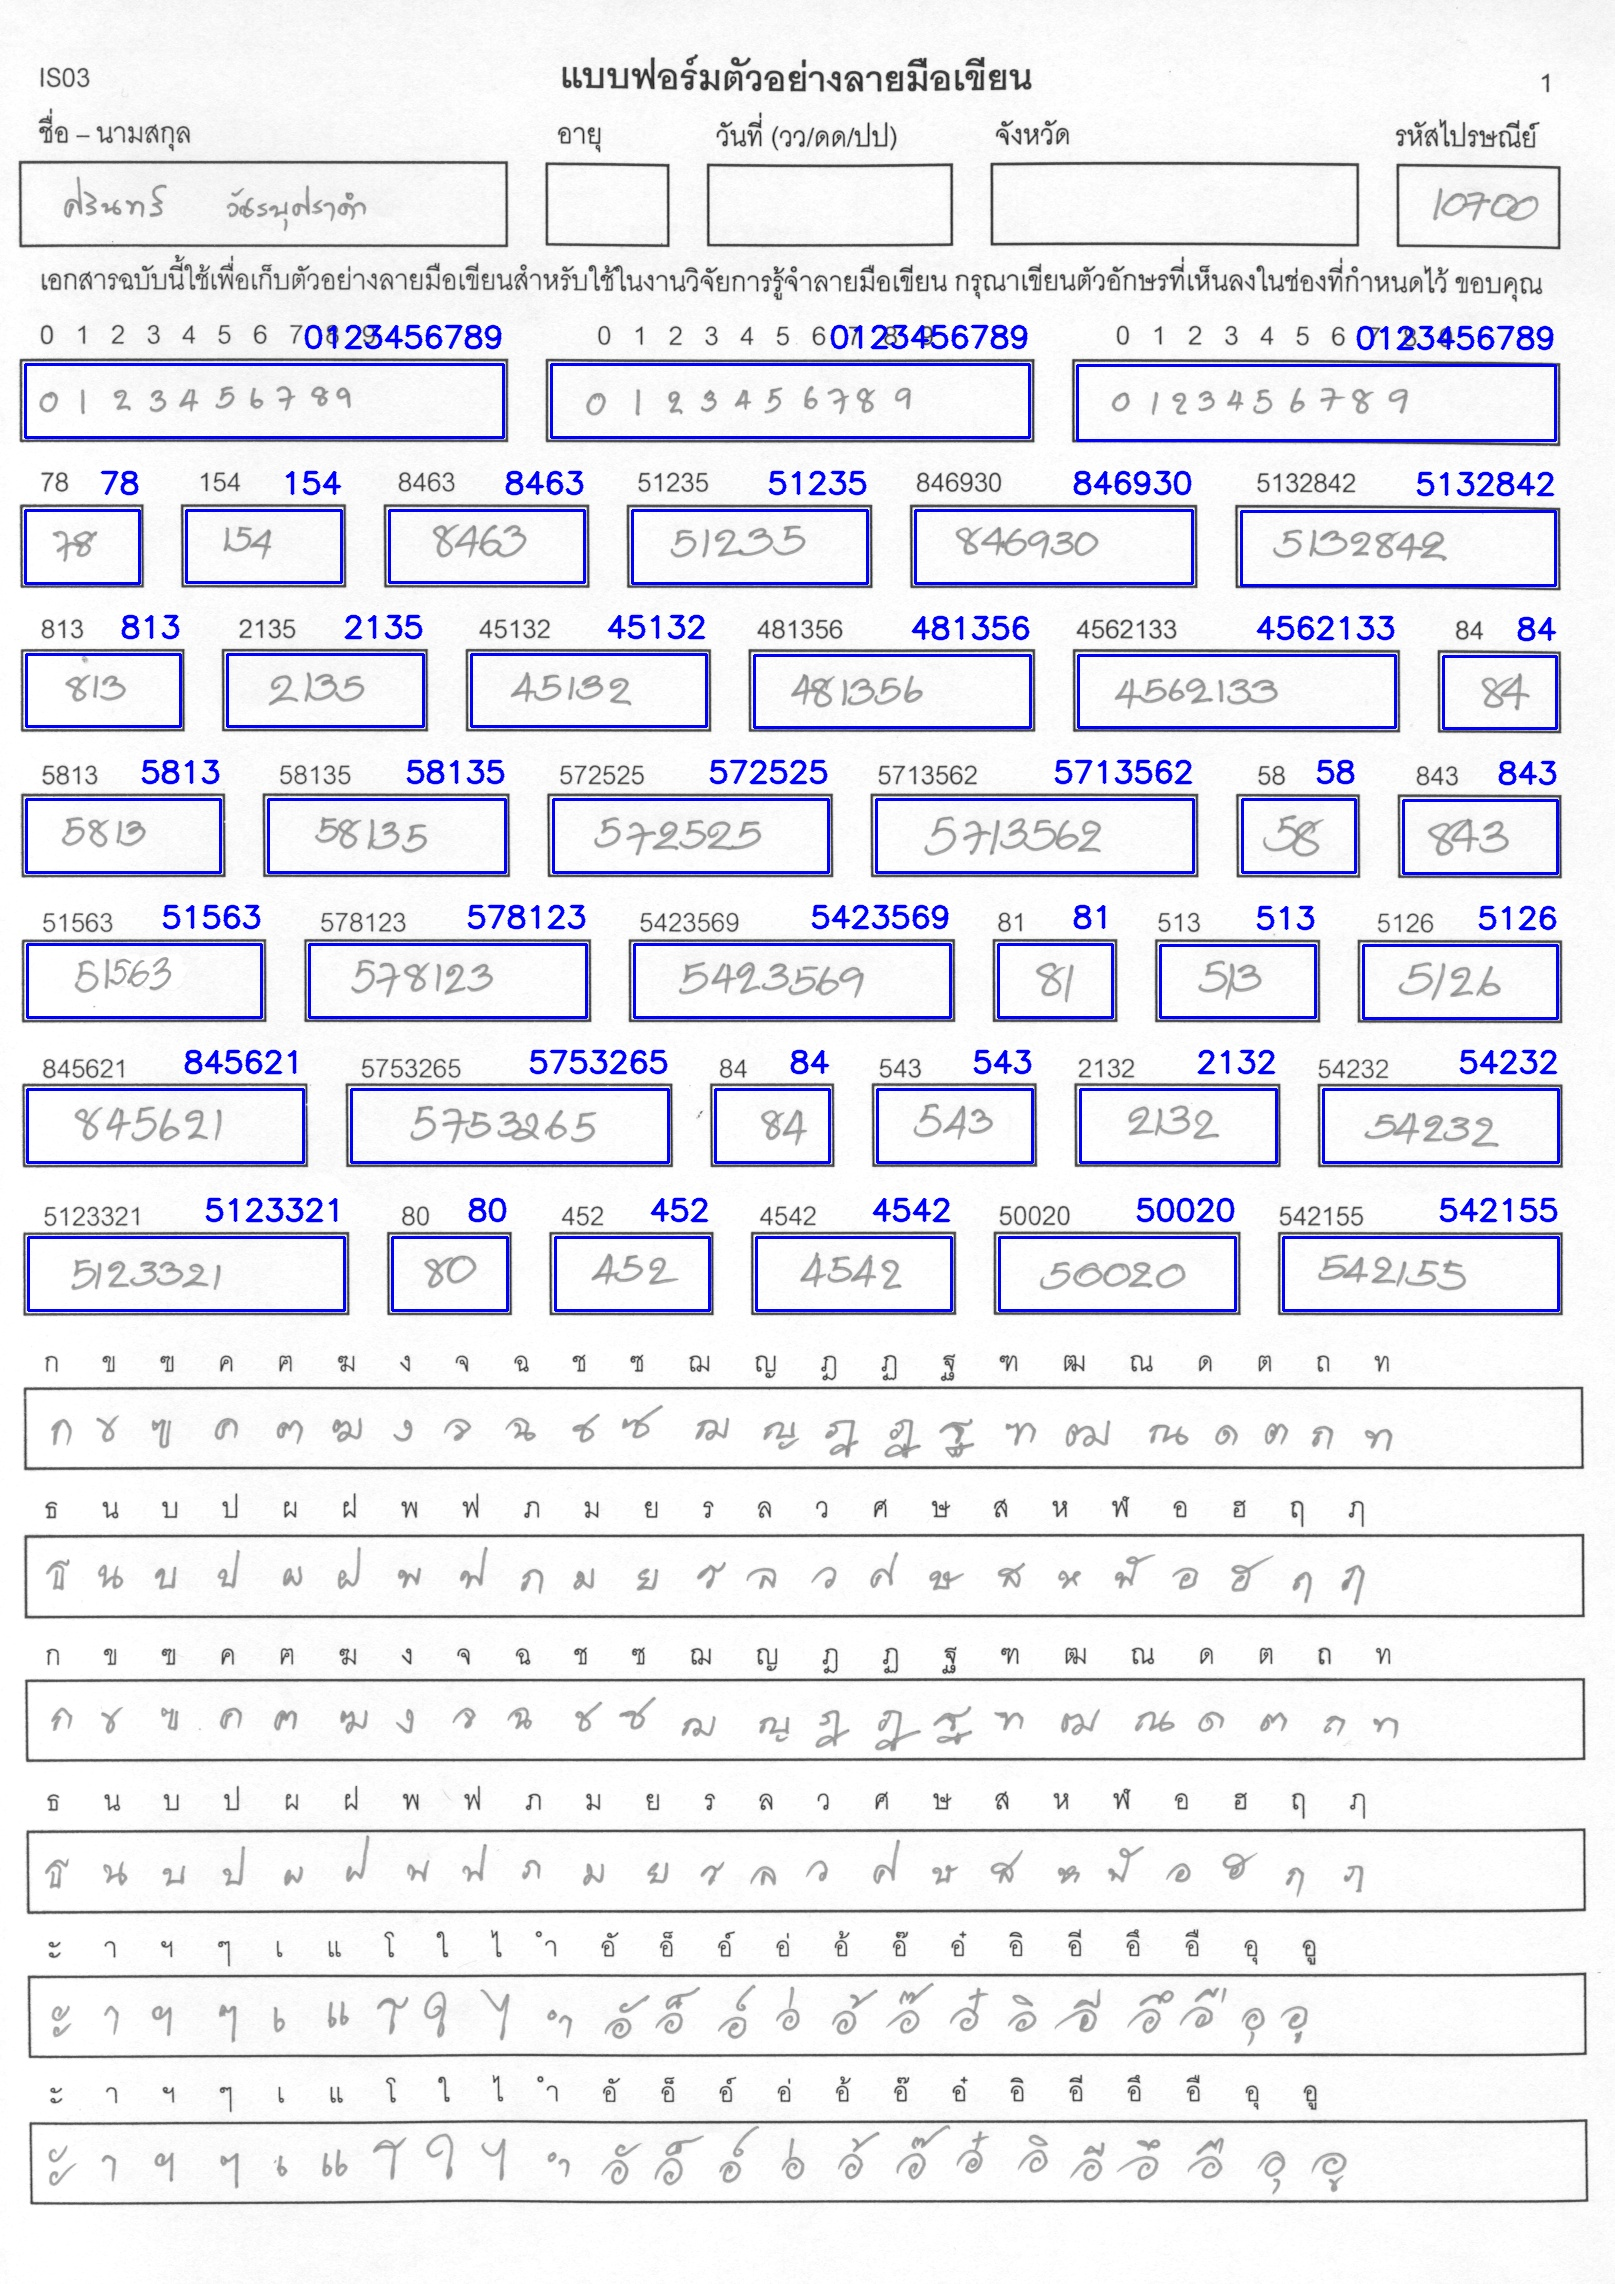

In [ ]:
import cv2
from PIL import Image
from IPython.display import Image

label_text = ["0123456789,0123456789,0123456789,12,543,4562,51853,561683,5183924,576,2462,98354,153485,5789321,69,3214,47832,478932,8963254,74,341,68421,475635,5127896,61,617,9822,842563,4180240,50,710,4500,10400,6448150,12,570,1240,59000,584100",
           "0123456789,0123456789,0123456789,57,125,4882,87235,684246,8135672,872,5324,57820,321579,8742166,87,4253,47135,515762,8103200,57,472,13032,710034,1532081,51,133,5122,871356,4231456,58,513,2012,10700,7895130,52,780,4233,15200,100000",
           "0123456789,0123456789,0123456789,78,154,8463,51235,846930,5132842,813,2135,45132,481356,4562133,84,5813,58135,572525,5713562,58,843,51563,578123,5423569,81,513,5126,845621,5753265,84,543,2132,54232,5123321,80,452,4542,50020,542155",
           "0123456789,0123456789,0123456789,21,123,5485,51267,125486,8456245,845,8452,12023,458252,5645215,51,8932,98215,513579,4895421,51,150,49216,423468,4216730,13,152,1150,499931,9015216,18,183,1112,16523,6921660,88,513,1144,51326,896125",
           "0123456789,0123456789,0123456789,81,463,1900,19212,192131,1921330,192,1892,12346,193162,1369316,22,1931,19231,164456,4346232,89,213,19213,513626,1521622,45,230,2123,212683,1296200,21,192,4523,51262,4213238,52,543,2546,45633,465125",
           "0123456789,0123456789,0123456789,20,138,8879,19597,865367,3013369,114,9499,55079,297032,7244055,60,7352,77523,280643,9108658,66,263,31618,170927,2237193,94,746,3764,625914,3160877,39,904,2673,82811,4851884,90,272,9574,42993,817566",
           "0123456789,0123456789,0123456789,64,784,1975,97059,521457,5788102,971,2643,70037,838750,1347430,24,0762,46469,028189,4126509,02,759,35394,230663,4377574,22,762,7862,625914,3160877,39,904,2673,82811,9190050,38,404,5962,94013,088266",             
           "0123456789,0123456789,0123456789,80,449,6084,13965,431350,6229102,422,1908,05665,761206,1639252,84,9782,11212,643378,4177232,37,154,99161,752639,3084336,03,697,7026,823024,3485374,49,194,4584,87307,4419223,55,500,7144,72657,802405",
           "0123456789,0123456789,0123456789,06,458,1552,19093,716189,3177738,253,1360,79349,041487,2316741,71,9288,99980,642082,0307806,55,690,48646,223430,6720358,15,329,2764,159890,8830239,43,468,3104,54475,4945431,37,427,7367,85663,346136",
           "0123456789,0123456789,0123456789,39,958,5622,57767,907676,3339983,687,9435,99419,073859,2883940,46,3444,44112,634760,5499598,41,247,41091,926670,0147351,30,249,4951,043416,2525819,71,112,7002,53555,1375436,98,915,8154,68368,426139"]
label_list = [s.split(',') for s in label_text]

path = '/content/dataset/68PersonsBmp/'
filename = 'is03007.bmp'

# get set idx from filename
set_idx = int(filename[2:4])-1

# read, convert to gray, binarized, threshold
image = cv2.imread(path+filename)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5,5), 0)
_, th = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# find contours
cts, hs = cv2.findContours(th.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# make bboxes of contours without child
bboxes = []
for id, ct in enumerate(cts):
    # only hierarchy with no child
    if hs[0,id,2]!=-1:        
        (x, y, w, h) = cv2.boundingRect(ct)
        
        # only bb with y-axis and width limit
        if y>300 and y<1300 and w>50:
            bboxes.append([x,y,x+w,y+h])

# sort bboxes with row id then x (row id = round(y/120) )
bboxes = sorted(bboxes, key = lambda x: (round(x[1]/120), x[0]))

idx = 0
for bb in bboxes:
    x1,y1,x2,y2 = bb

    # data bb
    cv2.rectangle(image, (x1+2,y1+2),(x2-2,y2-2), (255,0,0), 2)
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1
    color = (255, 0, 0)
    thickness = 2
    label = label_list[set_idx][idx]
    textsize,_ = cv2.getTextSize(label, cv2.FONT_HERSHEY_COMPLEX, font_scale, thickness)
    image = cv2.putText(image, label, (int(x2-textsize[0]), y1-15), font, font_scale, color, thickness, cv2.LINE_AA)
    idx += 1
cv2.imwrite('test.jpg', image)
Image(filename='test.jpg')

In [ ]:
import os
import glob
import cv2
from PIL import Image
from IPython.display import Image
import random

output_path = 'train/'
os.makedirs(output_path, exist_ok = True)

label_text = ["0123456789,0123456789,0123456789,12,543,4562,51853,561683,5183924,576,2462,98354,153485,5789321,69,3214,47832,478932,8963254,74,341,68421,475635,5127896,61,617,9822,842563,4180240,50,710,4500,10400,6448150,12,570,1240,59000,584100",
           "0123456789,0123456789,0123456789,57,125,4882,87235,684246,8135672,872,5324,57820,321579,8742166,87,4253,47135,515762,8103200,57,472,13032,710034,1532081,51,133,5122,871356,4231456,58,513,2012,10700,7895130,52,780,4233,15200,100000",
           "0123456789,0123456789,0123456789,78,154,8463,51235,846930,5132842,813,2135,45132,481356,4562133,84,5813,58135,572525,5713562,58,843,51563,578123,5423569,81,513,5126,845621,5753265,84,543,2132,54232,5123321,80,452,4542,50020,542155",
           "0123456789,0123456789,0123456789,21,123,5485,51267,125486,8456245,845,8452,12023,458252,5645215,51,8932,98215,513579,4895421,51,150,49216,423468,4216730,13,152,1150,499931,9015216,18,183,1112,16523,6921660,88,513,1144,51326,896125",
           "0123456789,0123456789,0123456789,81,463,1900,19212,192131,1921330,192,1892,12346,193162,1369316,22,1931,19231,164456,4346232,89,213,19213,513626,1521622,45,230,2123,212683,1296200,21,192,4523,51262,4213238,52,543,2546,45633,465125",
           "0123456789,0123456789,0123456789,20,138,8879,19597,865367,3013369,114,9499,55079,297032,7244055,60,7352,77523,280643,9108658,66,263,31618,170927,2237193,94,746,3764,625914,3160877,39,904,2673,82811,4851884,90,272,9574,42993,817566",
           "0123456789,0123456789,0123456789,64,784,1975,97059,521457,5788102,971,2643,70037,838750,1347430,24,0762,46469,028189,4126509,02,759,35394,230663,4377574,22,762,7862,625914,3160877,39,904,2673,82811,9190050,38,404,5962,94013,088266",             
           "0123456789,0123456789,0123456789,80,449,6084,13965,431350,6229102,422,1908,05665,761206,1639252,84,9782,11212,643378,4177232,37,154,99161,752639,3084336,03,697,7026,823024,3485374,49,194,4584,87307,4419223,55,500,7144,72657,802405",
           "0123456789,0123456789,0123456789,06,458,1552,19093,716189,3177738,253,1360,79349,041487,2316741,71,9288,99980,642082,0307806,55,690,48646,223430,6720358,15,329,2764,159890,8830239,43,468,3104,54475,4945431,37,427,7367,85663,346136",
           "0123456789,0123456789,0123456789,39,958,5622,57767,907676,3339983,687,9435,99419,073859,2883940,46,3444,44112,634760,5499598,41,247,41091,926670,0147351,30,249,4951,043416,2525819,71,112,7002,53555,1375436,98,915,8154,68368,426139"]
label_list = [s.split(',') for s in label_text]

def process(file):
    # get set idx from filename
    filename = os.path.basename(file)
    set_idx = int(filename[2:4])-1

    # read, convert to gray, binarized, threshold
    image = cv2.imread(path+filename)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    _, th = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    
    # find contours
    cts, hs = cv2.findContours(th.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

    # make bboxes of contours without child
    bboxes = []
    for id, ct in enumerate(cts):
        # only hierarchy with no child
        if hs[0,id,2]!=-1:        
            (x, y, w, h) = cv2.boundingRect(ct)
            
            # only bb with y-axis and width limit
            if y>300 and y<1300 and w>50:
                bboxes.append([x,y,x+w,y+h])

    # sort bboxes with row id then x (row id = round(y/120) )
    bboxes = sorted(bboxes, key = lambda x: (round(x[1]/120), x[0]))
    
    idx = 0
    for bb in bboxes:
        x1,y1,x2,y2 = bb

        label = label_list[set_idx][idx]
        hash = random.getrandbits(128)

        cv2.imwrite(f'{output_path}{label}_{hash:032x}.jpg', image[y1+2:y2-2,x1+2:x2-2])
        idx += 1

for f in glob.glob('/content/dataset/68PersonsBmp/*'):
    process(f)

<hr></hr>

In [ ]:
os.environ["WANDB_DISABLED"] = "true"
!pip install jiwer

     |████████████████████████████████| 50 kB 3.0 MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149862 sha256=77b0aa43a04d29576398aab4111356ecaa7eae964af010233df028ab05f83497
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built python-Levenshtein


In [ ]:
import glob

path = '/content/train/*'

train = []
for file in glob.glob(path):
    # make label from filename
    filename = os.path.basename(file)
    label = filename.split('_')[0]
    train.append([file, label])

df = pd.DataFrame(train, columns=['file_name', 'text'])
df

,file_name,text
0,/content/train/0123456789_e3474cfaec7cfd52c6c4...,0123456789
1,/content/train/52_d41289aec54f1cec6219b063bf14...,52
2,/content/train/346136_7a702c5d3ebf2f8d1ba0942e...,346136
3,/content/train/0123456789_5b81046914ef1a7e98b5...,0123456789
4,/content/train/463_f14539bcc2bcf04dbf389de6a86...,463
...,...,...
2647,/content/train/82811_24c9130e9e2500cfb5f5d4215...,82811
2648,/content/train/247_b565c0157cddc476207786edd63...,247
2649,/content/train/68368_94be1fa694c8a062977f1a7cb...,68368
2650,/content/train/88_4497a97725a432e9c95a23c8cf2b...,88


In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.15)
# we reset the indices to start from zero
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

In [ ]:
import torch
from torch.utils.data import Dataset
from PIL import Image

class IAMDataset(Dataset):
    def __init__(self, root_dir, df, processor, max_target_length=128):
        self.root_dir = root_dir
        self.df = df
        self.processor = processor
        self.max_target_length = max_target_length

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        # get file name + text 
        file_name = self.df['file_name'][idx]
        text = self.df['text'][idx]
        # prepare image (i.e. resize + normalize)
        image = Image.open(self.root_dir + file_name).convert("RGB")
        pixel_values = self.processor(image, return_tensors="pt").pixel_values
        # add labels (input_ids) by encoding the text
        labels = self.processor.tokenizer(text, 
                                          padding="max_length", 
                                          max_length=self.max_target_length).input_ids
        # important: make sure that PAD tokens are ignored by the loss function
        labels = [label if label != self.processor.tokenizer.pad_token_id else -100 for label in labels]

        encoding = {"pixel_values": pixel_values.squeeze(), "labels": torch.tensor(labels)}
        return encoding

In [ ]:
!pip install transformers

     |████████████████████████████████| 3.5 MB 5.4 MB/s 
     |████████████████████████████████| 6.8 MB 35.3 MB/s 
     |████████████████████████████████| 895 kB 44.5 MB/s 
     |████████████████████████████████| 596 kB 36.6 MB/s 
     |████████████████████████████████| 67 kB 4.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
!pip -q install sentencepiece

     |████████████████████████████████| 1.2 MB 5.4 MB/s 


In [ ]:
from transformers import TrOCRProcessor

processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
train_dataset = IAMDataset(root_dir='',
                           df=train_df,
                           processor=processor)
eval_dataset = IAMDataset(root_dir='',
                           df=test_df,
                           processor=processor)

Downloading:   0%|          | 0.00/4.03k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/228 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.09k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

In [ ]:
print("Number of training examples:", len(train_dataset))
print("Number of validation examples:", len(eval_dataset))

Number of training examples: 2254
Number of validation examples: 398


In [ ]:
encoding = train_dataset[0]
for k,v in encoding.items():
  print(k, v.shape)

pixel_values torch.Size([3, 384, 384])
labels torch.Size([128])


Label: 1144


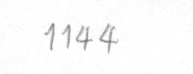

In [ ]:
image = Image.open(train_dataset.root_dir + train_df['file_name'][0]).convert("RGB")
print('Label: '+train_df['text'][0])
image

In [ ]:
labels = encoding['labels']
print(labels)

labels[labels == -100] = processor.tokenizer.pad_token_id
label_str = processor.decode(labels, skip_special_tokens=True)
print('Decoded Label:', label_str)

tensor([   0, 1225, 3305,    2, -100, -100, -100, -100, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -100, -100, -100])
Decoded Label: 1144


In [ ]:
!pip -q install datasets

     |████████████████████████████████| 311 kB 5.5 MB/s 
     |████████████████████████████████| 133 kB 42.3 MB/s 
     |████████████████████████████████| 243 kB 34.4 MB/s 
     |████████████████████████████████| 1.1 MB 33.4 MB/s 
     |████████████████████████████████| 271 kB 37.5 MB/s 
     |████████████████████████████████| 94 kB 3.0 MB/s 
     |████████████████████████████████| 144 kB 6.7 MB/s 


In [ ]:
from datasets import load_metric

cer_metric = load_metric("cer")

def compute_metrics(pred):
    labels_ids = pred.label_ids
    pred_ids = pred.predictions

    pred_str = processor.batch_decode(pred_ids, skip_special_tokens=True)
    labels_ids[labels_ids == -100] = processor.tokenizer.pad_token_id
    label_str = processor.batch_decode(labels_ids, skip_special_tokens=True)

    cer = cer_metric.compute(predictions=pred_str, references=label_str)

    return {"cer": cer}

Downloading:   0%|          | 0.00/2.16k [00:00<?, ?B/s]

In [ ]:
from transformers import VisionEncoderDecoderModel

model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-stage1")

Downloading:   0%|          | 0.00/4.11k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.43G [00:00<?, ?B/s]

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-stage1 and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# set special tokens used for creating the decoder_input_ids from the labels
model.config.decoder_start_token_id = processor.tokenizer.cls_token_id
model.config.pad_token_id = processor.tokenizer.pad_token_id
# make sure vocab size is set correctly
model.config.vocab_size = model.config.decoder.vocab_size

# set beam search parameters
model.config.eos_token_id = processor.tokenizer.sep_token_id
model.config.max_length = 10
model.config.early_stopping = True
model.config.no_repeat_ngram_size = 3
model.config.length_penalty = 2.0
model.config.num_beams = 4

In [ ]:
from transformers import default_data_collator
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments

training_args = Seq2SeqTrainingArguments(
    num_train_epochs=1,
    predict_with_generate=True,
    evaluation_strategy="steps",
    per_device_train_batch_size=1,
    per_device_eval_batch_size=1,
    fp16=True, 
    output_dir=".",
    logging_steps=2,
    save_steps=1000,
    eval_steps=200,
    save_total_limit=1,
)

# instantiate trainer
trainer = Seq2SeqTrainer(
    model=model,
    tokenizer=processor.feature_extractor,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    data_collator=default_data_collator,
)

trainer.train()

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
Using the `WAND_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
Using amp half precision backend
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 2254
  Num Epochs = 1
  Instantaneous batch size per device = 1
  Total train batch size (w. parallel, distributed & acc

RuntimeError: ignored

In [ ]:
!nvidia-smi

Sat Feb  5 05:50:53 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    71W / 149W |  11425MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------